In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline
from pyecharts import Bar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("C:/Users/Lee Jung Un/Documents/data/google-play-store-apps/googleplaystore.csv", sep=',', encoding="UTF-8")
#df = df.set_index("App")
#pd.set_option('display.max_columns', 200)
#df.tail(5)

In [3]:

df.dropna(inplace = True)

In [ ]:
df.shape

In [4]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature'{col_name}'has {unique_cat} unique categories".format(
        col_name=col_name, unique_cat=unique_cat))

Feature'App'has 8190 unique categories
Feature'Category'has 33 unique categories
Feature'Reviews'has 5990 unique categories
Feature'Size'has 413 unique categories
Feature'Installs'has 19 unique categories
Feature'Type'has 2 unique categories
Feature'Price'has 73 unique categories
Feature'Content Rating'has 6 unique categories
Feature'Genres'has 115 unique categories
Feature'Last Updated'has 1299 unique categories
Feature'Current Ver'has 2638 unique categories
Feature'Android Ver'has 31 unique categories


In [5]:
unique_df = df.drop_duplicates(['App'])
unique_df.head()
#print(unique_df['Category'].value_counts().sort_values(ascending=False))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
#df2 = pd.get_dummies(unique_df, columns=['Category'])

In [ ]:
unique_df.info()

In [9]:
#unique_df['Category'].replace(1.9, 'Other')
print(unique_df['Category'].value_counts().sort_values(ascending=False))
unique_df[unique_df['Price']=='Everyone']
#unique_df['Price'].value_counts().sort_values(ascending=False)

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
PHOTOGRAPHY             263
BUSINESS                263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
unique_df['Price'].unique().tolist()

In [6]:
# 잘못들어간 값 전처리

unique_df['Category'].replace(
    to_replace=['1.9'],
    value='ART_AND_DESIGN',
    inplace=True
)

unique_df['Genres'].replace(
    to_replace=['February 11, 2018'],
    value='Other',
    inplace=True
)

unique_df['Rating'].replace(
    to_replace=['nan'],
    value=unique_df['Rating'].mean(),
    inplace=True
)

unique_df['Rating'].replace(
    to_replace=[19.0],
    value=1.9,
    inplace=True
)

unique_df['Size'].replace(
    to_replace=['1,000+'],
    value='3.0M',
    inplace=True
)

unique_df['Reviews'].replace(
    to_replace=['3.0M'],
    value='19',
    inplace=True
)

unique_df['Installs'].replace(
    to_replace=['0+','Free','0'],
    value='0',
    inplace=True
)

unique_df['Type'].replace(
    to_replace=['0'],
    value='Free',
    inplace=True
)

unique_df['Price'].replace(
    to_replace=['Everyone'],
    value='0',
    inplace=True
)

unique_df['Content Rating'].replace(
    to_replace=['Everyone 10+', 'Unrated', 'nan'],
    value='Everyone',
    inplace=True
)

unique_df['Content Rating'].replace(
    to_replace=['Mature 17+'],
    value='Adults only',
    inplace=True
)

unique_df['Content Rating'].replace(
    to_replace=['Adults only 18+'],
    value='Adults only',
    inplace=True
)

unique_df['Content Rating'].replace(
    to_replace='nan',
    value='Everyone',
    inplace=True
)

unique_df['Last Updated'].replace(
    to_replace=['1.0.19'],
    value='February 11, 2018',
    inplace=True
)

unique_df['Current Ver'].replace(
    to_replace=['4.0 and up'],
    value='1.0.19',
    inplace=True
)

unique_df['Android Ver'].replace(
    to_replace='nan',
    value='1.0.19',
    inplace=True
)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
= unique_df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design
6,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design
7,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design
8,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design
9,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity


In [59]:
unique_df["Content Rating"]

0        Everyone
1        Everyone
2        Everyone
3            Teen
4        Everyone
5        Everyone
6        Everyone
7        Everyone
8        Everyone
9        Everyone
10       Everyone
11       Everyone
12           Teen
13       Everyone
14       Everyone
16       Everyone
17       Everyone
18       Everyone
19       Everyone
20       Everyone
21       Everyone
22       Everyone
24       Everyone
25       Everyone
26       Everyone
27       Everyone
28       Everyone
29       Everyone
30       Everyone
31       Everyone
           ...   
10795    Everyone
10796    Everyone
10797    Everyone
10799    Everyone
10800    Everyone
10801    Everyone
10802        Teen
10803        Teen
10804        Teen
10805    Everyone
10809    Everyone
10810    Everyone
10812    Everyone
10814        Teen
10815    Everyone
10817    Everyone
10819        Teen
10820        Teen
10826        Teen
10827    Everyone
10828    Everyone
10829    Everyone
10830    Everyone
10832    Everyone
10833    E

In [ ]:
unique_df[unique_df['Reviews']=='3.0M']

In [9]:
# Cleaning Categories into integers
CategoryString = unique_df["Category"]
categoryVal = unique_df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df2["Category_c"] = unique_df["Category"].map(category_dict).astype(int)

NameError: name 'df2' is not defined

In [6]:
df2.head()

NameError: name 'df2' is not defined

In [8]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
    
df2["Size"] = unique_df["Size"].map(change_size)

#filling Size which had NA
df2.Size.fillna(method = 'ffill', inplace = True)

TypeError: 'NoneType' object does not support item assignment

In [11]:
df2['Reviews'] = unique_df['Reviews'].astype(int)

NameError: name 'df2' is not defined

In [15]:
#Cleaning no of installs classification
df2['Installs'] = [int(i[:-1].replace(',','')) for i in unique_df['Installs']]

In [ ]:
#unique_df['Installs'] = unique_df['Installs'].str.replace('+','')
#unique_df['Installs'] = unique_df['Installs'].str.replace(',','')
#print(unique_df['Installs'])

In [ ]:
#unique_df['Installs'] = unique_df['Installs'].astype(int)

In [ ]:
#Cleaning no of installs classification
#unique_df['Installs'] = [int(i[:-1]) for i in unique_df['Installs'].astype(int)]

In [16]:
#Converting Type classification into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df2['Type'] = unique_df['Type'].map(type_cat)

In [17]:
#Cleaning of content rating classification
RatingL = unique_df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df2['Content Rating'] = unique_df['Content Rating'].map(RatingDict).astype(int)

In [18]:
#Cleaning of genres
GenresL = unique_df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df2['Genres_c'] = unique_df['Genres'].map(GenresDict).astype(int)

In [12]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

unique_df['Price'] = unique_df['Price'].map(price_clean).astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
unique_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
df["Category"].describe()

count       9360
unique        33
top       FAMILY
freq        1746
Name: Category, dtype: object

[(0, 30)]

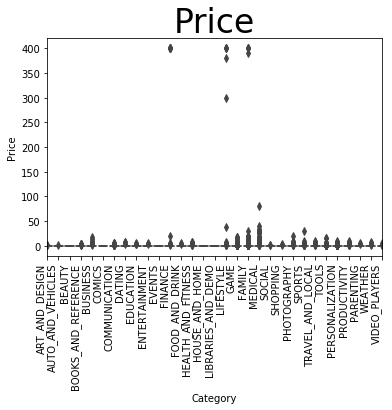

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.boxplot(x="Category", y="Price", data=unique_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
 
plt.title('Price',size = 33)
g.set(xlim=(0, 30))

[(0, 30)]

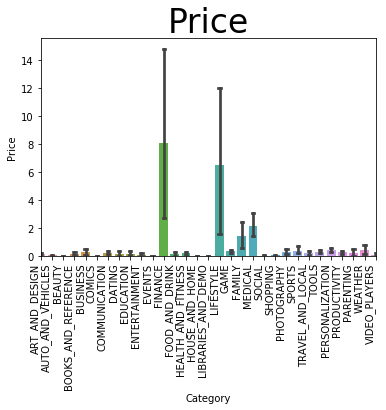

In [30]:
b = sns.barplot(x="Category", y="Price", data=unique_df, capsize=.2)
b.set_xticklabels(b.get_xticklabels(), rotation=90, ha="right")
 
plt.title('Price',size = 33)
b.set(xlim=(0, 30))
#b.set(ylim=(0, 40))

[(0, 5)]

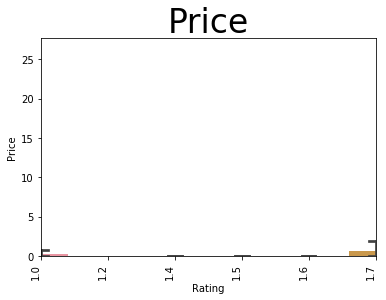

In [17]:
b = sns.barplot(x="Rating", y="Price", data=unique_df, capsize=.2)
b.set_xticklabels(b.get_xticklabels(), rotation=90, ha="right")
 
plt.title('Price',size = 33)
b.set(xlim=(0, 5))
#b.set(ylim=(0, 40))

[(0, 40)]

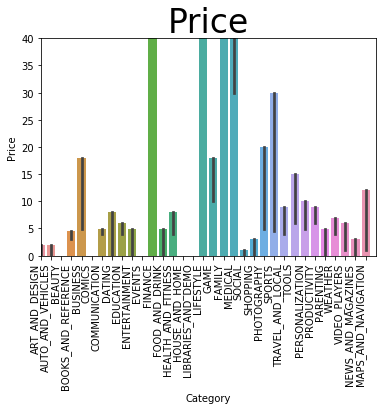

In [35]:
from numpy import median
ax = sns.barplot(x="Category", y="Price", data=unique_df, estimator=max)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
 
plt.title('Price',size = 33)
ax.set(xlim=(0, 33))
ax.set(ylim=(0, 40))

In [ ]:
g = sns.catplot(x="sex", y="total_bill",
                 hue="smoker", col="time",
                data=tips, kind="bar",
                 height=4, aspect=.7);

In [87]:
df2["Installs"].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [ ]:
#파일내보내기
#df2.to_csv("C:/Users/Lee Jung Un/Documents/data/google-play-store-apps/file_3.csv")

In [ ]:
#프로파일링
#pandas_profiling.ProfileReport (unique_df)

In [ ]:
#히트맵
#plt.figure(figsize=(15, 15))
#sns.heatmap(data = df2.corr(), annot=True,
#           fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [15]:
#dropping of unrelated and unnecessary items
df2.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 43 columns):
Rating                          8190 non-null float64
Reviews                         8190 non-null int32
Size                            8190 non-null float64
Installs                        8190 non-null int64
Type                            8190 non-null int64
Price                           8190 non-null float64
Content Rating                  8190 non-null int32
Genres                          8190 non-null object
Category_ART_AND_DESIGN         8190 non-null uint8
Category_AUTO_AND_VEHICLES      8190 non-null uint8
Category_BEAUTY                 8190 non-null uint8
Category_BOOKS_AND_REFERENCE    8190 non-null uint8
Category_BUSINESS               8190 non-null uint8
Category_COMICS                 8190 non-null uint8
Category_COMMUNICATION          8190 non-null uint8
Category_DATING                 8190 non-null uint8
Category_EDUCATION              8190 non-null uint8
C

In [64]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [18]:
y = df["Rating"]
x = df2["Category_ART_AND_DESIGN"]
bar = pyecharts.Bar("Rating", "Rating of each ategory")
bar.use_theme("dark")
bar.add("Rating", x, y, mark_line=["average"], mark_point=["max", "min"])
#bar.add("evaporation", attr, v2, mark_line=["average"], mark_point=["max", "min"])
bar.height = 500
bar.width = 800
bar

NameError: name 'pyecharts' is not defined

In [ ]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [ ]:
#excluding Genre label
from sklearn.linear_model import LinearRegression 

#Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

#Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

#dummy encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

#adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

In [22]:
g = sns.catplot(x="Category", y="Rating", height=3.5, aspect=1.5, kind="box", legend=False, data=df2)
g.add_legend(title="Category")
g.set_axis_labels=("Rating")
g.set(ylim=(0, 5))
g.despine(trime=True)
g.fig.set_size_inches(6.5, 3.5)
plt.set(g.ax.get_yticklabels(), rotation=90)

AttributeError: module 'seaborn' has no attribute 'catplot'

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

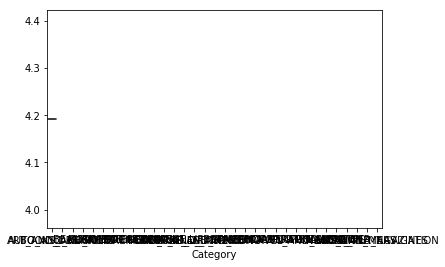

In [16]:
R = df["Rating"].mean()
g = sns.boxplot(x="Category",y=R ,data=df, palette = "Set1")
g.set_xticklabels(rotation=90)
plt.ylim(0, 5)
g.set(xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

AttributeError: 'AxesSubplot' object has no attribute 'ax'

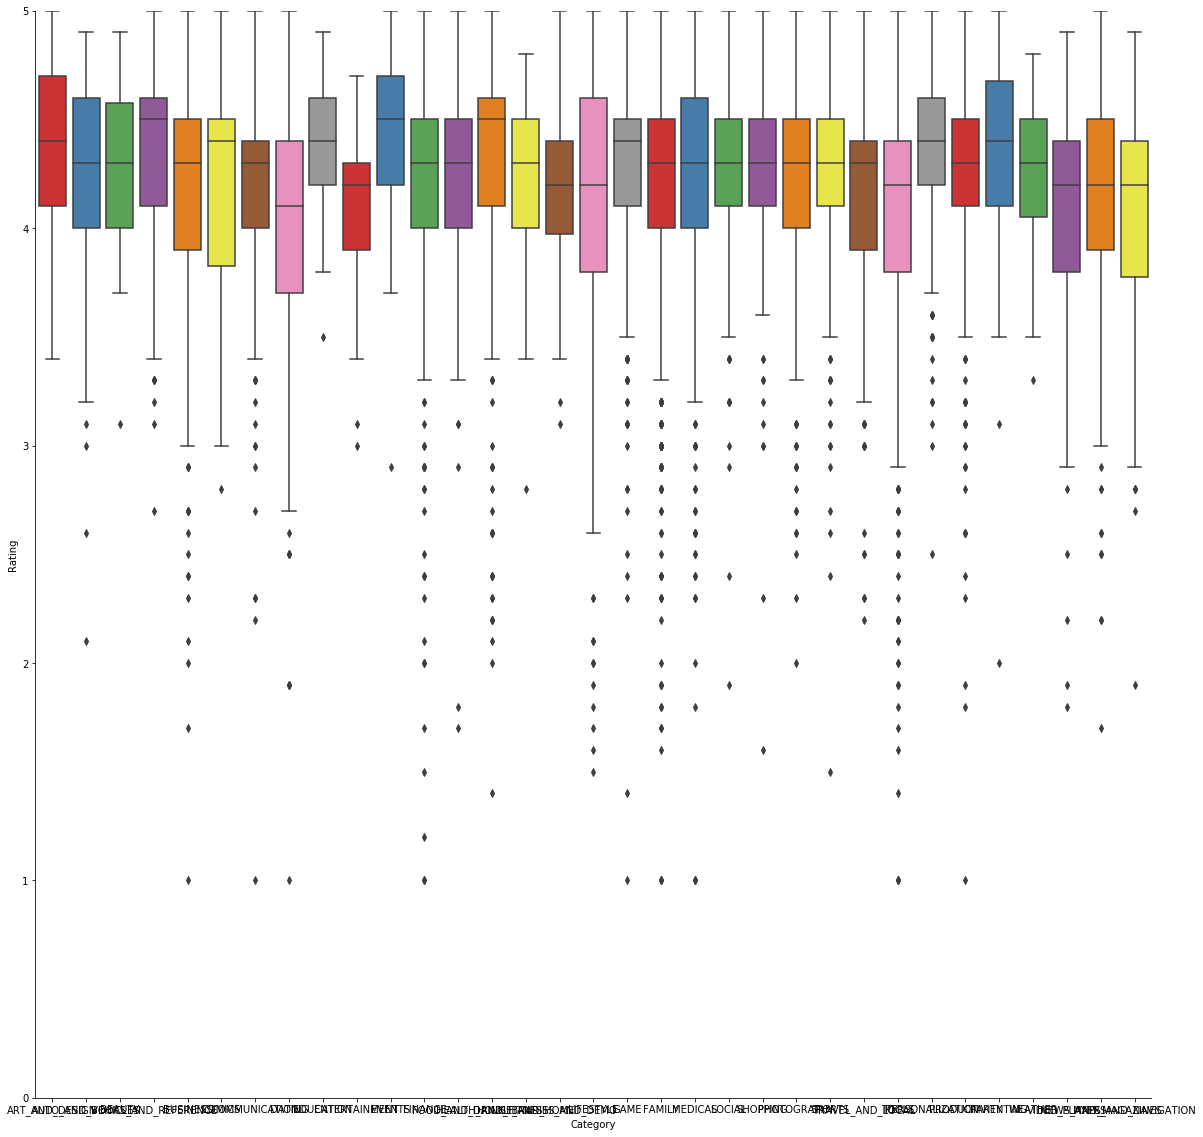

In [20]:
import seaborn as sns
plt.figure(figsize=(20,20))
g = sns.boxplot(x='Category', y='Rating', data=df, palette='Set1')
sns.despine(fig=None,left=False)
plt.ylim(0, 5)
plt.setp(g.ax.get_yticklabels(), rotation=30);

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
g = sns.catplot(x="Category", y="Rating", height=3.5, aspect=1.5, kind="box", legend=False, data=df2)
g.add_legend(title="Category")
g.set_axis_labels=("Rating")
g.set(ylim=(0, 5))
g.despine(trime=True)
g.fig.set_size_inches(6.5, 3.5)
plt.set(g.ax.get_yticklabels(), rotation=90)

AttributeError: module 'seaborn' has no attribute 'catplot'

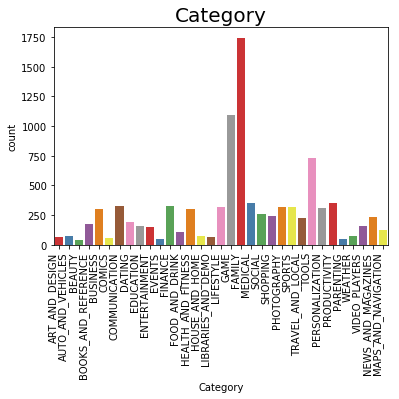

In [9]:
g = sns.countplot(x="Category", data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Category',size = 20)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 47 columns):
App                             8190 non-null object
Rating                          8190 non-null float64
Reviews                         8190 non-null int32
Size                            8190 non-null float64
Installs                        8190 non-null int64
Type                            8190 non-null int64
Price                           8190 non-null float64
Content Rating                  8190 non-null int32
Genres                          8190 non-null object
Last Updated                    8190 non-null object
Current Ver                     8190 non-null object
Android Ver                     8190 non-null object
Category_ART_AND_DESIGN         8190 non-null uint8
Category_AUTO_AND_VEHICLES      8190 non-null uint8
Category_BEAUTY                 8190 non-null uint8
Category_BOOKS_AND_REFERENCE    8190 non-null uint8
Category_BUSINESS               8190 non-null uin

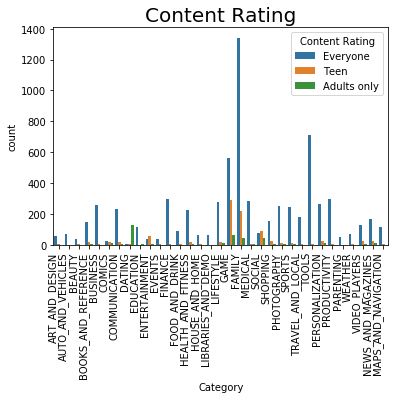

In [64]:
g = sns.countplot(x = "Category", hue="Content Rating", data=unique_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Content Rating',size = 20)

In [ ]:
g = sns.countplot(x = "Price", hue="Category", data=unique_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Content Rating',size = 20)
g.set(ylim=(0, 400))

[(0, 400)]

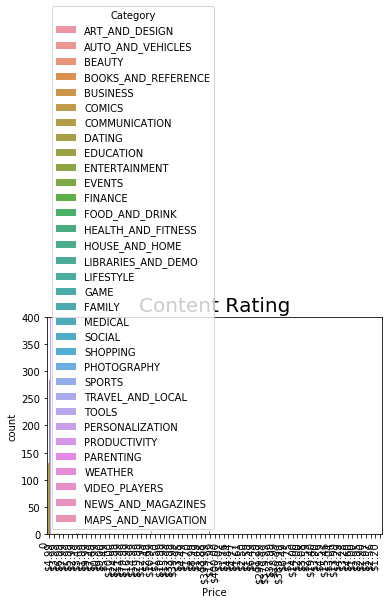

In [33]:
g = sns.countplot(x = "Price", hue="Category", data=unique_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Content Rating',size = 20)
g.set(ylim=(0, 400))

In [13]:
df['Rating'].mean()

4.191837606837612

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
n = sns.boxplot(x="Category", y="Price", data=df2)
n.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
 
plt.title('Rating',size = 20)
g.set(xlim=(0, 20))

ValueError: Could not interpret input 'Category'

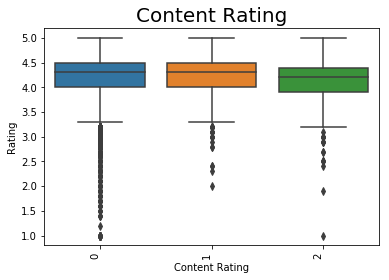

In [23]:
g = sns.boxplot(x = "Content Rating", y="Rating", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Content Rating',size = 20)

In [17]:
g = sns.boxplot(x = "Category", y="Rating", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Price',size = 20)

ValueError: Could not interpret input 'Category'

In [24]:
df2[df2['Content Rating']==2]

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Category_c,Genres_c
133,Dresses Ideas & Fashions +3000,4.5,473,8200000.0,100000,0,0.00,2,Beauty,"March 1, 2017",...,0,0,0,0,0,0,0,0,2,4
166,Read books online,4.1,91615,23000000.0,5000000,0,0.00,2,Books & Reference,"June 29, 2018",...,0,0,0,0,0,0,0,0,3,5
170,Flybook,3.9,1778,4900000.0,500000,0,0.00,2,Books & Reference,"October 16, 2014",...,0,0,0,0,0,0,0,0,3,5
298,Manga Master - Best manga & comic reader,4.6,24005,4900000.0,500000,0,0.00,2,Comics,"July 4, 2018",...,0,0,0,0,0,0,0,0,5,7
302,MangaToon - Comics updated Daily,3.9,834,15000000.0,50000,0,0.00,2,Comics,"August 1, 2018",...,0,0,0,0,0,0,0,0,5,7
303,Manga Net – Best Online Manga Reader,4.1,1010,11000000.0,50000,0,0.00,2,Comics,"July 7, 2018",...,0,0,0,0,0,0,0,0,5,7
312,Daily Manga - Comic & Webtoon,3.2,1446,7100000.0,100000,0,0.00,2,Comics,"May 18, 2018",...,0,0,0,0,0,0,0,0,5,7
313,"漫咖 Comics - Manga,Novel and Stories",4.1,12088,21000000.0,1000000,0,0.00,2,Comics,"July 6, 2018",...,0,0,0,0,0,0,0,0,5,7
324,- Free Comics - Comic Apps,3.5,115,9100000.0,10000,0,0.00,2,Comics,"July 13, 2018",...,0,0,0,0,0,0,0,0,5,7
327,pixiv comic - everyone's manga app,4.4,18814,38000000.0,1000000,0,0.00,2,Comics,"July 30, 2018",...,0,0,0,0,0,0,0,0,5,7


In [106]:
#0 Everyone, 1 Teen 2 
df2['Content Rating'].describe()

count    8190.000000
mean        0.155678
std         0.363581
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Content Rating, dtype: float64

In [99]:
df2.tail(10)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Category_c,Category,Genres_c
10828,Manga-FR - Anime Vostfr,3.4,291,13000000.0,10000,0,0.0,0,Comics,"May 15, 2017",...,0,0,0,0,0,0,0,5,None,7
10829,Bulgarian French Dictionary Fr,4.6,603,7400000.0,10000,0,0.0,0,Books & Reference,"June 19, 2016",...,0,0,0,0,0,0,0,3,None,5
10830,News Minecraft.fr,3.8,881,2300000.0,100000,0,0.0,0,News & Magazines,"January 20, 2014",...,0,0,0,0,0,0,0,31,None,100
10832,FR Tides,3.8,1195,582000.0,100000,0,0.0,0,Weather,"February 16, 2014",...,0,0,0,0,0,0,1,29,None,97
10833,Chemin (fr),4.8,44,619000.0,1000,0,0.0,0,Books & Reference,"March 23, 2014",...,0,0,0,0,0,0,0,3,None,5
10834,FR Calculator,4.0,7,2600000.0,500,0,0.0,0,Education,"June 18, 2017",...,0,0,0,0,0,0,0,18,None,12
10836,Sya9a Maroc - FR,4.5,38,53000000.0,5000,0,0.0,0,Education,"July 25, 2017",...,0,0,0,0,0,0,0,18,None,12
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3600000.0,100,0,0.0,0,Education,"July 6, 2018",...,0,0,0,0,0,0,0,18,None,12
10839,The SCP Foundation DB fr nn5n,4.5,114,3600000.0,1000,0,0.0,1,Books & Reference,"January 19, 2015",...,0,0,0,0,0,0,0,3,None,5
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,398307,19000000.0,10000000,0,0.0,0,Lifestyle,"July 25, 2018",...,0,0,0,0,0,0,0,16,None,28


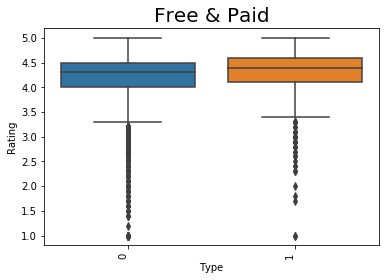

In [75]:
g = sns.boxplot(x = "Type", y="Rating", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Free & Paid',size = 20)

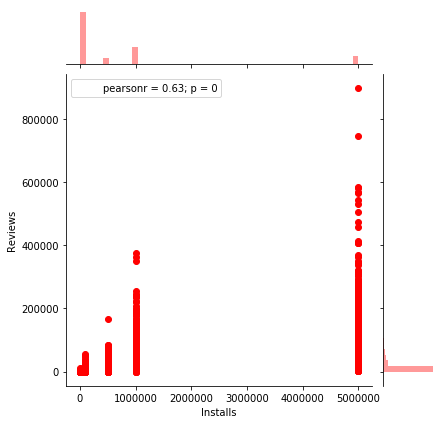

In [15]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Installs", y="Reviews",color = 'red', data=df2[df2['Installs']<10000000], size = 6)

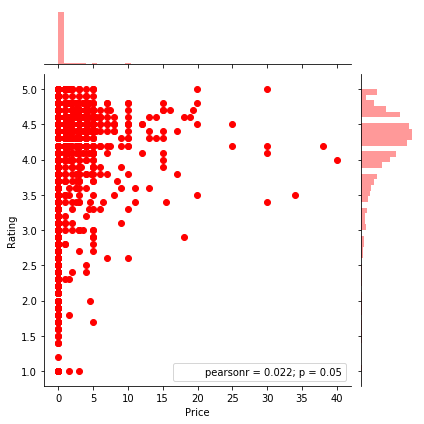

In [24]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Price", y="Rating",color = 'red', data=unique_df[unique_df['Price']<50], size = 6)
#g.set(xlim=(0, 5))

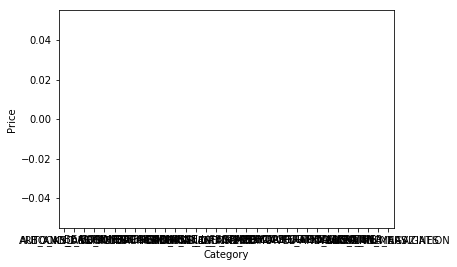

In [31]:
from numpy import median
ax = sns.barplot(x="Category", y="Price", data=unique_df, estimator=median)

In [42]:
unique_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
unique_df.sort_values(['Price'], ascending=[False])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,"1,000+",Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,"5,000+",Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,"1,000+",Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


In [28]:
g = sns.boxplot(x="Category",y="Rating",data=df2, height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

ValueError: Could not interpret input 'Category'

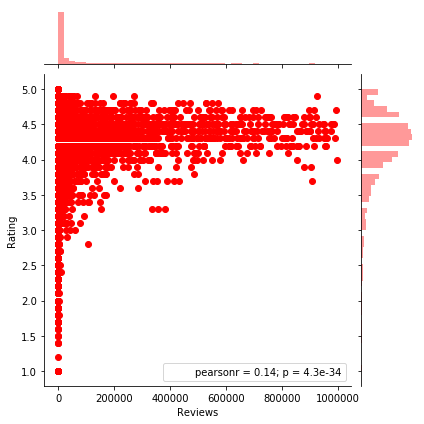

In [31]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Reviews", y="Rating",color = 'red', data=df2[df2['Reviews']<1000000], size = 6)

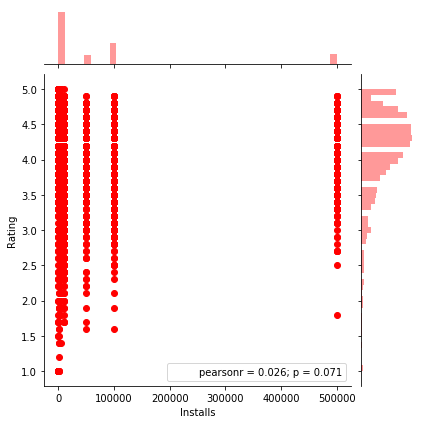

In [66]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Installs", y="Reviews",color = 'red', data=df2[df2['Installs']<1000000], size = 6)

In [61]:
df['Size'].replace('Varies with device', np.nan, inplace = True )
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

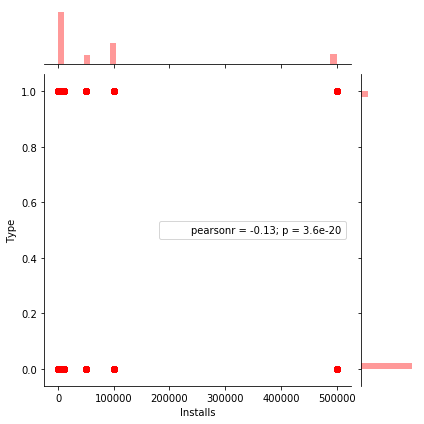

In [92]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Installs", y="Type",color = 'red', data=df2[df2["Installs"]<1000000], size = 6)

In [50]:
ax = sns.lineplot(x="Size", y="Rating", data=df2)

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [52]:
df.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [51]:
df2.head(100)

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Category_c,Genres_c
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,2
5,Paper flowers instructions,4.4,167,5600000.0,50000,0,0.0,0,Art & Design,"March 26, 2017",...,0,0,0,0,0,0,0,0,0,0
6,Smoke Effect Photo Maker - Smoke Editor,3.8,178,19000000.0,50000,0,0.0,0,Art & Design,"April 26, 2018",...,0,0,0,0,0,0,0,0,0,0
7,Infinite Painter,4.1,36815,29000000.0,1000000,0,0.0,0,Art & Design,"June 14, 2018",...,0,0,0,0,0,0,0,0,0,0
8,Garden Coloring Book,4.4,13791,33000000.0,1000000,0,0.0,0,Art & Design,"September 20, 2017",...,0,0,0,0,0,0,0,0,0,0
9,Kids Paint Free - Drawing Fun,4.7,121,3100000.0,10000,0,0.0,0,Art & Design;Creativity,"July 3, 2018",...,0,0,0,0,0,0,0,0,0,2


In [ ]:
bins = [1, 10, 30, 50, 70,100]
labels = ["10대이하", "10~20대", "30~40대", "50~60대", "70대이상"]
titanic_ages = pd.cut(titanic["age"], bins, labels = labels)
titanic["ages_grade"] = titanic_ages
titanic.tail()

In [87]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
=df.sort_values(['Reviews'], ascending=[False])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,1.916498e+07,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,1.916498e+07,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.241000e+07,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.241000e+07,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1.241000e+07,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,1.916498e+07,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,1.916498e+07,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,1.916498e+07,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,1.916498e+07,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,1.241000e+07,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


In [19]:
unique_df['Installs'] = unique_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
unique_df['Installs'] = unique_df['Installs'].apply(lambda x: int(str(x).replace(',', '')) if ',' in str(x) else x)

#google['Price'] = google['Price'].apply(lambda x: float(str(x).replace('$', '')) if '$' in str(x) else x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
group3 = unique_df.groupby('Category')
#group1.App.count().sort_values(by='App', ascending = False)
table3 = group3.Installs.sum().sort_values(ascending = False)

table3 = pd.DataFrame(table3)

table3[:10]

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [57]:
df3 = unique_df["Category"]
result = pd.concat([df2, df3])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [58]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16380 entries, 0 to 10840
Data columns (total 45 columns):
Rating                          8190 non-null float64
Reviews                         8190 non-null float64
Size                            8190 non-null float64
Installs                        8190 non-null float64
Type                            8190 non-null float64
Price                           8190 non-null float64
Content Rating                  8190 non-null float64
Genres                          8190 non-null object
Category_ART_AND_DESIGN         8190 non-null float64
Category_AUTO_AND_VEHICLES      8190 non-null float64
Category_BEAUTY                 8190 non-null float64
Category_BOOKS_AND_REFERENCE    8190 non-null float64
Category_BUSINESS               8190 non-null float64
Category_COMICS                 8190 non-null float64
Category_COMMUNICATION          8190 non-null float64
Category_DATING                 8190 non-null float64
Category_EDUCATION          

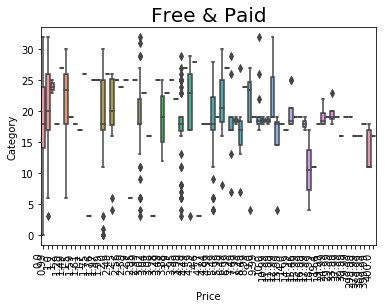

In [60]:
g = sns.boxplot(x = "Price", y="Category", data=result)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Free & Paid',size = 20)

[(0, 20)]

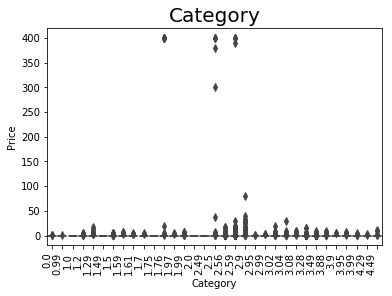

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
n = sns.boxplot(x="Category", y="Price", data=result)
n.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
 
plt.title('Category',size = 20)
g.set(xlim=(0, 20))